In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [58]:
data_path=r'C:\Codefield\CODE_C\PYTHON\ML\data.xlsx'
df=pd.read_excel(data_path)
df.head()

,Time Stamp,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,24.12.2023 23:00,-2.8,775.6,776.1,-0.2,85,无风,0,NaN,NaN,...,NaN,NaN,2.8,-5.0,1,12.0,NaN,NaN,NaN,NaN
1,24.12.2023 20:00,-1.3,775.8,776.2,0.1,72,从西南方吹来的风,1,NaN,8.0,...,NaN,NaN,3.1,-5.7,1,12.0,NaN,NaN,NaN,NaN
2,24.12.2023 17:00,4.6,775.7,776.2,-0.2,41,从西方吹来的风,2,NaN,8.0,...,NaN,NaN,8.0,-7.5,1,12.0,NaN,NaN,NaN,NaN
3,24.12.2023 14:00,5.9,775.9,776.3,-2.1,37,从西方吹来的风,4,NaN,8.0,...,NaN,NaN,9.0,-7.7,1,12.0,NaN,NaN,NaN,NaN
4,24.12.2023 11:00,4.0,778.0,778.5,-0.3,44,从西北偏西方向吹来的风,3,NaN,7.0,...,NaN,NaN,10.0,-7.4,1,12.0,NaN,NaN,NaN,NaN


In [59]:
""" df.loc[(df['RRR']!='无降水') & (pd.notna(df['RRR'])) & (df['RRR']!='降水迹象'),'RRR']=0
df.loc[df['RRR']=='无降水','RRR']=1
df.loc[df['RRR']=='降水迹象','RRR']=1
#df.loc[pd.isna(df['RRR']),'RRR']=1
df['RRR']=df['RRR'].astype('float64') """
df.loc[df['VV']=='低于 0.1','VV']=0
df['VV']=df['VV'].astype('float64')
df["Date"],df['Month']='',''
df["Date"]=df["Time Stamp"].apply(lambda x:x[0:10])
df['Month']=df["Time Stamp"].apply(lambda x:x[3:5])
df['Month']=df['Month'].astype('int64')
""" df['Time']=''
df['Time']=df["Time Stamp"].apply(lambda x:x[11:13])
df['Year']=''
df['Year']=df["Time Stamp"].apply(lambda x:x[8:10])
A=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18']
B=['18','17','16','15','14','13','12']
for year in A :
    if year not in B:
        df.drop(df[df['Year']==year].index, inplace=True)
df.drop(columns=["Year"],inplace=True) """
df.drop(columns=["Time Stamp","tR"],inplace=True)


In [60]:
""" list=dict(df['Date'].value_counts(sort=False)).values()
index=df.columns.get_loc('RRR')
begin=end=0
for num in list:
    end+=num
    list1=df.iloc[begin:end]['RRR'].values.tolist()
    if 0 in list1:
        df.iloc[begin:end,index]=0
    elif np.isnan(list1).sum()==0 and len(list1)==8:
        df.iloc[begin:end,index]=1
    else:
        df.iloc[begin:end,index]=np.nan
    begin=end
df.drop(df[pd.isna(df['RRR'])].index, inplace=True) """
df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       2832 non-null   float64
 1   Po      2832 non-null   float64
 2   P       2831 non-null   float64
 3   Pa      2654 non-null   float64
 4   U       2832 non-null   int64  
 5   DD      2832 non-null   object 
 6   Ff      2832 non-null   int64  
 7   ff10    0 non-null      float64
 8   ff3     2518 non-null   float64
 9   N       89 non-null     object 
 10  WW      2832 non-null   object 
 11  W1      2047 non-null   object 
 12  W2      2047 non-null   object 
 13  Tn      2751 non-null   float64
 14  Tx      2566 non-null   float64
 15  Cl      0 non-null      float64
 16  Nh      0 non-null      float64
 17  H       2582 non-null   object 
 18  Cm      0 non-null      float64
 19  Ch      0 non-null      float64
 20  VV      2831 non-null   float64
 21  Td      2832 non-null   float64
 22  

In [61]:
attributes=df.columns.values
print(attributes)
for attribute in attributes:
    if attribute not in ["T", "Po", "P", "Pa", "U", "Ff", "ff3", "Tn", "Tx", "VV", "Td","RRR",'Month']:
        df.drop(columns=[attribute],inplace=True)
df.info()
print(df['RRR'])

['T' 'Po' 'P' 'Pa' 'U' 'DD' 'Ff' 'ff10' 'ff3' 'N' 'WW' 'W1' 'W2' 'Tn' 'Tx'
 'Cl' 'Nh' 'H' 'Cm' 'Ch' 'VV' 'Td' 'RRR' 'E' 'Tg' "E'" 'sss' 'Month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       2832 non-null   float64
 1   Po      2832 non-null   float64
 2   P       2831 non-null   float64
 3   Pa      2654 non-null   float64
 4   U       2832 non-null   int64  
 5   Ff      2832 non-null   int64  
 6   ff3     2518 non-null   float64
 7   Tn      2751 non-null   float64
 8   Tx      2566 non-null   float64
 9   VV      2831 non-null   float64
 10  Td      2832 non-null   float64
 11  RRR     2832 non-null   int64  
 12  Month   2832 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 287.8 KB
0       1
1       1
2       1
3       1
4       1
       ..
2827    1
2828    1
2829    1
2830    1
2831    1
Name: RRR, Length: 2832, dtype:

In [62]:
corr=df.corr()
corr

,T,Po,P,Pa,U,Ff,ff3,Tn,Tx,VV,Td,RRR,Month
T,1.000000,-0.857133,-0.857823,-0.106341,0.068423,0.085283,-0.077103,0.926025,0.930994,0.370029,0.900307,-0.175499,0.292683
Po,-0.857133,1.000000,0.999974,0.068504,-0.315997,0.016855,0.051345,-0.864857,-0.863519,-0.129903,-0.877515,0.289936,-0.114278
P,-0.857823,0.999974,1.000000,0.068383,-0.315675,0.016442,0.051644,-0.865459,-0.864261,-0.130407,-0.878063,0.289683,-0.115128
Pa,-0.106341,0.068504,0.068383,1.000000,0.216656,-0.001578,0.140183,0.013858,0.007061,-0.075322,0.014180,-0.088282,0.011657
U,0.068423,-0.315997,-0.315675,0.216656,1.000000,-0.368921,-0.101770,0.322903,0.184538,-0.221553,0.489150,-0.393235,0.117910
Ff,0.085283,0.016855,0.016442,-0.001578,-0.368921,1.000000,0.543352,0.032819,0.022994,0.209174,-0.073097,-0.092447,-0.074906
ff3,-0.077103,0.051345,0.051644,0.140183,-0.101770,0.543352,1.000000,-0.005599,-0.001502,0.176546,-0.100319,-0.182354,-0.035340
Tn,0.926025,-0.864857,-0.865459,0.013858,0.322903,0.032819,-0.005599,1.000000,0.913461,0.359243,0.950341,-0.295658,0.308171
Tx,0.930994,-0.863519,-0.864261,0.007061,0.184538,0.022994,-0.001502,0.913461,1.000000,0.294031,0.897125,-0.139833,0.294639
VV,0.370029,-0.129903,-0.130407,-0.075322,-0.221553,0.209174,0.176546,0.359243,0.294031,1.000000,0.251214,0.035438,0.326938


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'T'),
  Text(0, 1.5, 'Po'),
  Text(0, 2.5, 'P'),
  Text(0, 3.5, 'Pa'),
  Text(0, 4.5, 'U'),
  Text(0, 5.5, 'Ff'),
  Text(0, 6.5, 'ff3'),
  Text(0, 7.5, 'Tn'),
  Text(0, 8.5, 'Tx'),
  Text(0, 9.5, 'VV'),
  Text(0, 10.5, 'Td'),
  Text(0, 11.5, 'RRR'),
  Text(0, 12.5, 'Month')])

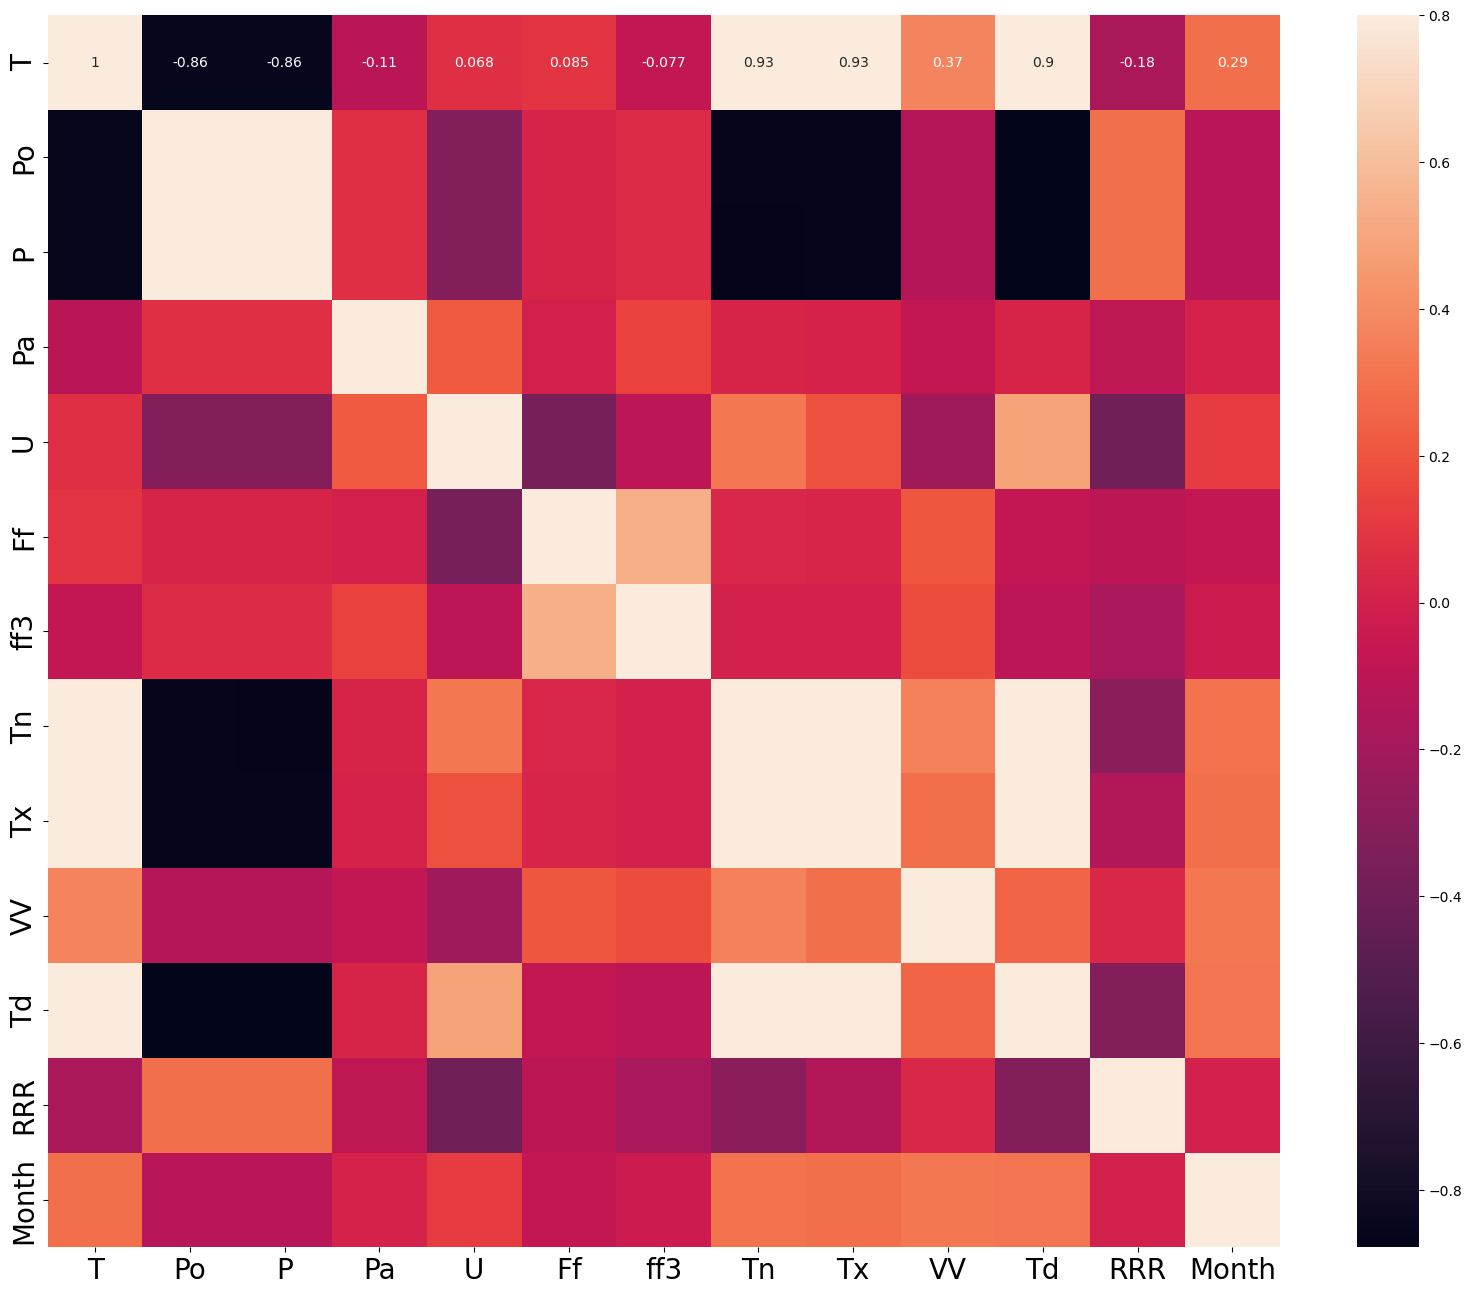

In [63]:
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [9]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data_path=r'C:\Codefield\CODE_C\PYTHON\ML\data.xlsx'
df=pd.read_excel(data_path)
df.loc[df['VV']=='低于 0.1','VV']=0
df['VV']=df['VV'].astype('float64')
df.drop(columns=["Time Stamp","tR"],inplace=True)
features=["DD", "WW", "W2", "H",'RRR']
attributes=df.columns.values
for attribute in attributes:
    if attribute not in features:
        df.drop(columns=[attribute],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DD      2832 non-null   object
 1   WW      2832 non-null   object
 2   W2      2047 non-null   object
 3   H       2582 non-null   object
 4   RRR     2832 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 110.8+ KB


In [18]:
for x in features:
    label=preprocessing.LabelEncoder()
    df.loc[:,x]=label.fit_transform(df.loc[:,x])
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DD      2832 non-null   object
 1   WW      2832 non-null   object
 2   W2      2832 non-null   object
 3   H       2832 non-null   object
 4   RRR     2832 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 110.8+ KB
None
      DD  WW W2  H  RRR
0     16  15  1  0    1
1     14  15  0  0    1
2     15   1  0  0    1
3     15   1  0  0    1
4     10   1  0  0    1
...   ..  .. .. ..  ...
2827   6  15  0  0    1
2828   0   1  0  0    1
2829   6   1  0  0    1
2830  12   1  0  0    1
2831   6   5  0  0    1

[2832 rows x 5 columns]


In [19]:
corr=df.corr()
corr

,DD,WW,W2,H,RRR
DD,1.000000,0.083319,0.032687,-0.062071,-0.033772
WW,0.083319,1.000000,0.039052,0.000169,-0.178861
W2,0.032687,0.039052,1.000000,0.140988,-0.003047
H,-0.062071,0.000169,0.140988,1.000000,-0.073589
RRR,-0.033772,-0.178861,-0.003047,-0.073589,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'DD'),
  Text(0, 1.5, 'WW'),
  Text(0, 2.5, 'W2'),
  Text(0, 3.5, 'H'),
  Text(0, 4.5, 'RRR')])

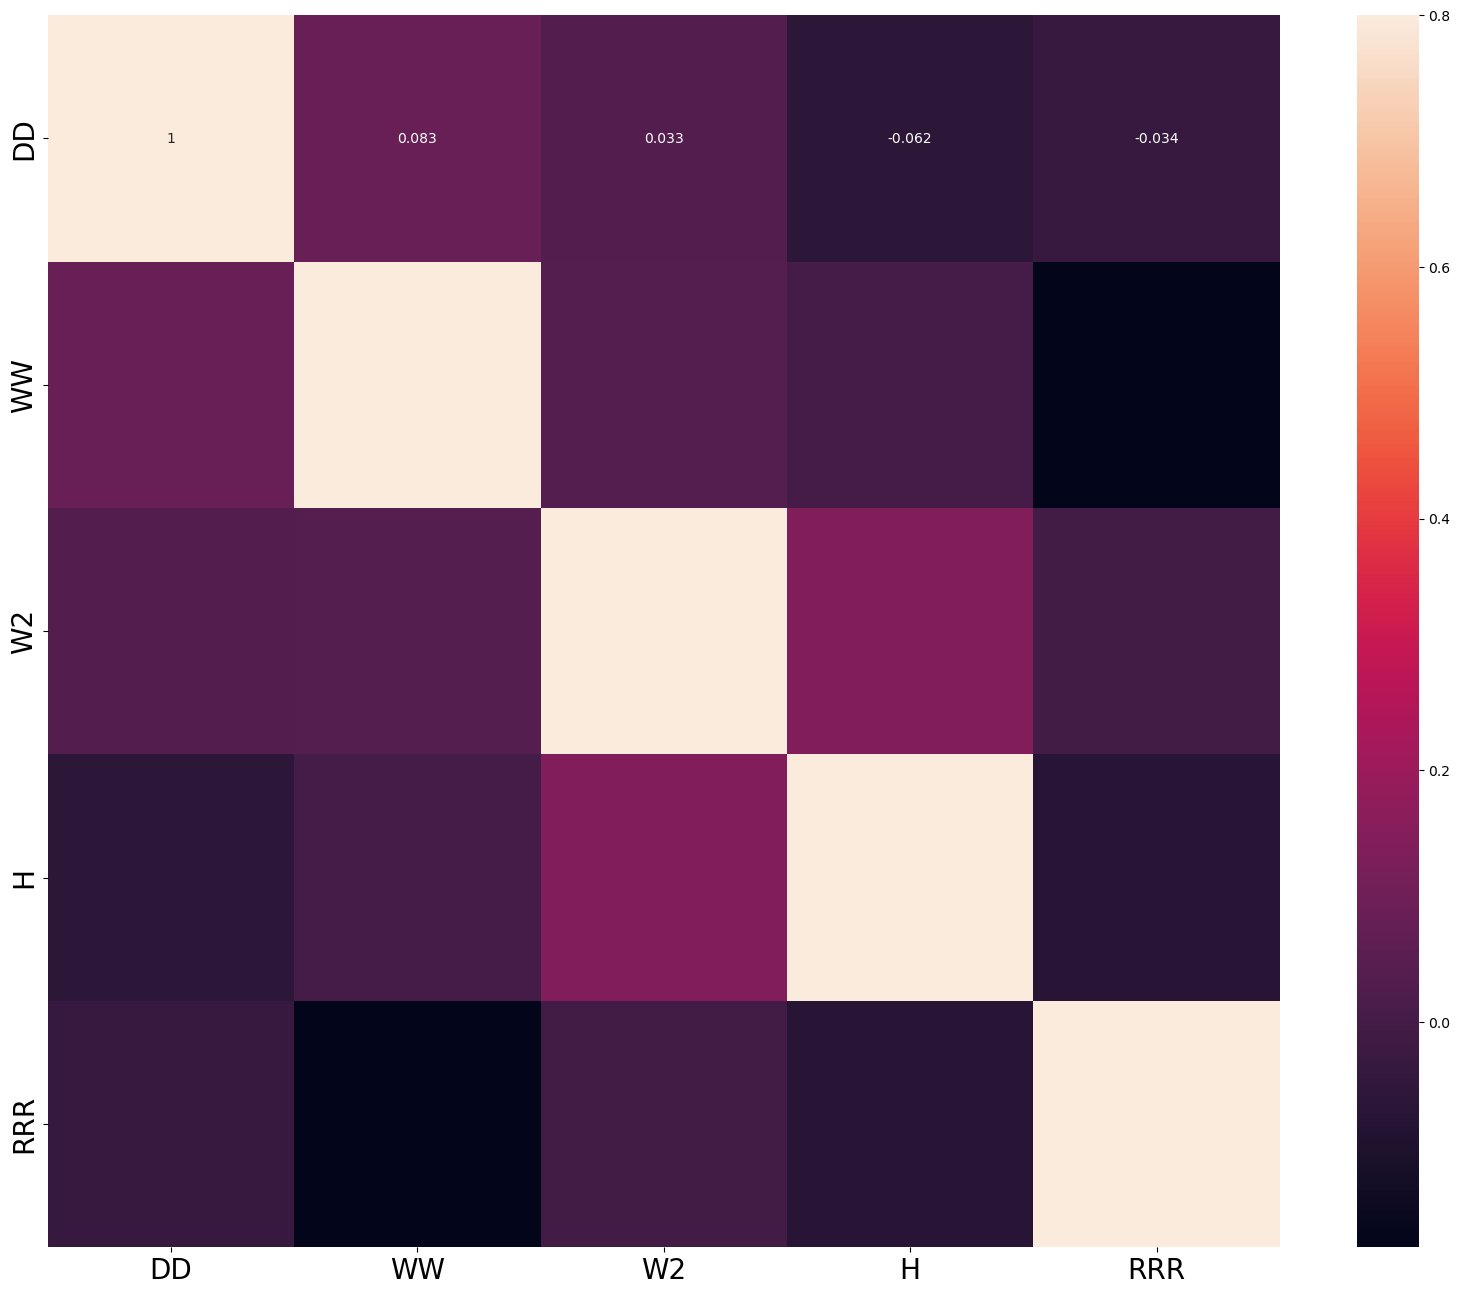

In [20]:
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)